In [7]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [8]:
np.random.seed(0)

In [9]:
def datos_sesgados(sesgo, cantidad, maximo):
    #distribucion normal sesgada
    aleatorios = stats.skewnorm.rvs(sesgo, loc = 2.5, size = cantidad, random_state = 0)
    aleatorios = aleatorios + abs(aleatorios.min())
    aleatorios = np.round(aleatorios, 2)/aleatorios.max() * maximo
    return np.round(aleatorios, 1)

In [10]:
edades=datos_sesgados(3, 1000000, 62)

In [11]:
edades

array([37.6, 29.9, 32.8, ..., 34.1, 29.9, 33. ])

In [12]:
edades.min()

15.4

In [13]:
edades.max()

62.0

In [14]:
edades.mean()

30.1375047

In [15]:
tamano_muestra= 100
#sacar muestras
muestra = np.random.choice(edades, tamano_muestra)
muestra

array([25.2, 32.1, 29.7, 27.3, 44.6, 31. , 35.8, 28.8, 33.1, 27.1, 29.4,
       34.8, 32.3, 31.2, 26.3, 28.6, 32.8, 21.1, 23.7, 31. , 31.1, 32.7,
       34.8, 26.8, 32.1, 43.3, 30.3, 22.1, 26.9, 22.6, 27.7, 30.2, 33.4,
       30.8, 32.6, 23.3, 34.3, 23.3, 29.9, 31.4, 27.4, 28.4, 29.7, 41. ,
       35.8, 30.7, 31. , 28.8, 26.1, 24.2, 26. , 38.8, 26.1, 34.8, 32.1,
       26.2, 27.2, 24.6, 32.3, 30.8, 33.9, 32.3, 28.8, 33.8, 28.3, 25.4,
       24.6, 26.9, 24.8, 32.2, 28.2, 31.9, 40.4, 30.8, 27. , 27.7, 23.4,
       20.4, 27.9, 20.8, 29. , 35.6, 32.6, 22.8, 29.2, 30.3, 29.7, 27.4,
       32.8, 27.7, 27.3, 31.6, 27.6, 27.5, 31.7, 25.8, 25. , 32. , 26.9,
       38.4])

In [20]:
muestras_generadas = np.array([])
num_muestras = 1000

for i in range (num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(edades, tamano_muestra, replace=True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas

                            

array([[26.6, 23.3, 27.7, ..., 25.1, 26.1, 33. ],
       [23.2, 29.9, 33.2, ..., 27. , 27.3, 28.1],
       [25. , 28.6, 31.7, ..., 30.2, 32.1, 36.1],
       ...,
       [32.8, 30.6, 29.8, ..., 31.4, 29.1, 24.6],
       [25.4, 25.2, 38.2, ..., 24.6, 30.1, 37.6],
       [23.2, 25.2, 32.3, ..., 35.1, 25.5, 28.3]])

In [21]:
muestras_generadas.shape

(1000, 100)

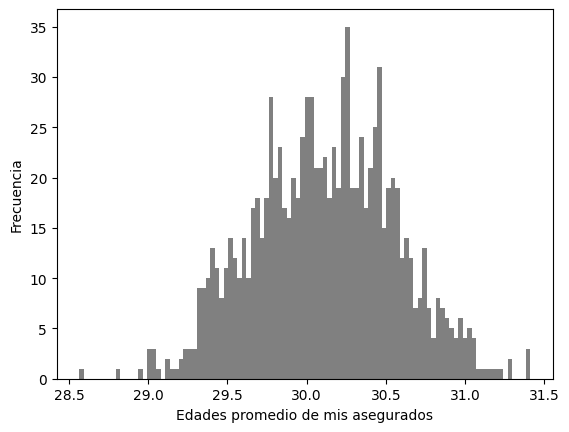

In [23]:
# Distribución muestral de la media
plt.hist(muestras_generadas.mean(axis=1), bins = 100, color = "gray")
plt.xlabel("Edades promedio de mis asegurados")
plt.ylabel("Frecuencia")
plt.show()


In [24]:
# Intervalo de confianza
int_confianza = np.quantile(muestras_generadas.mean(axis=1), [0.025, 0.975])

In [27]:
int_confianza

array([29.3069, 30.9712])

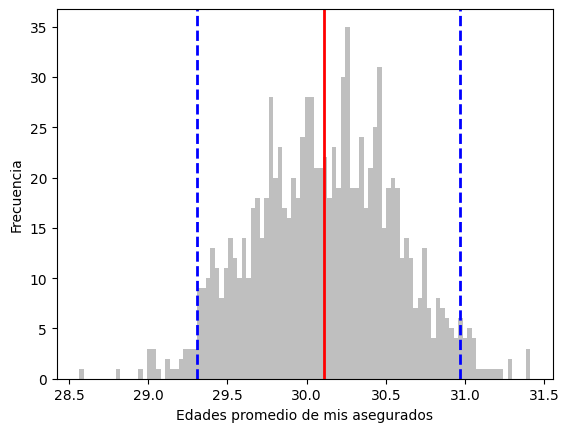

In [32]:
# Distribución muestral de la media
plt.hist(muestras_generadas.mean(axis=1), bins = 100, alpha=0.5, color = "gray")
plt.xlabel("Edades promedio de mis asegurados")
plt.ylabel("Frecuencia")

# Añadir líneas verticales para el intervalo de confianza
plt.axvline(int_confianza[0], color='blue', linestyle='--', linewidth=2, label=f"Límite inferior IC (2.5%): {int_confianza[0]:.2f}")
plt.axvline(int_confianza[1], color='blue', linestyle='--', linewidth=2, label=f"Límite superior IC (97.5%): {int_confianza[1]:.2f}")

# Añadir línea vertical para la media muestral
plt.axvline(muestras_generadas.mean(), color='red', linestyle='-', linewidth=2, label=f"Media muestral: {muestras_generadas.mean():.2f}")

plt.show()


In [29]:
muestras_generadas.mean()


30.112545000000004

In [31]:
muestra.mean()

29.679000000000006